# Johnson & Johnson quarterly earnings per share

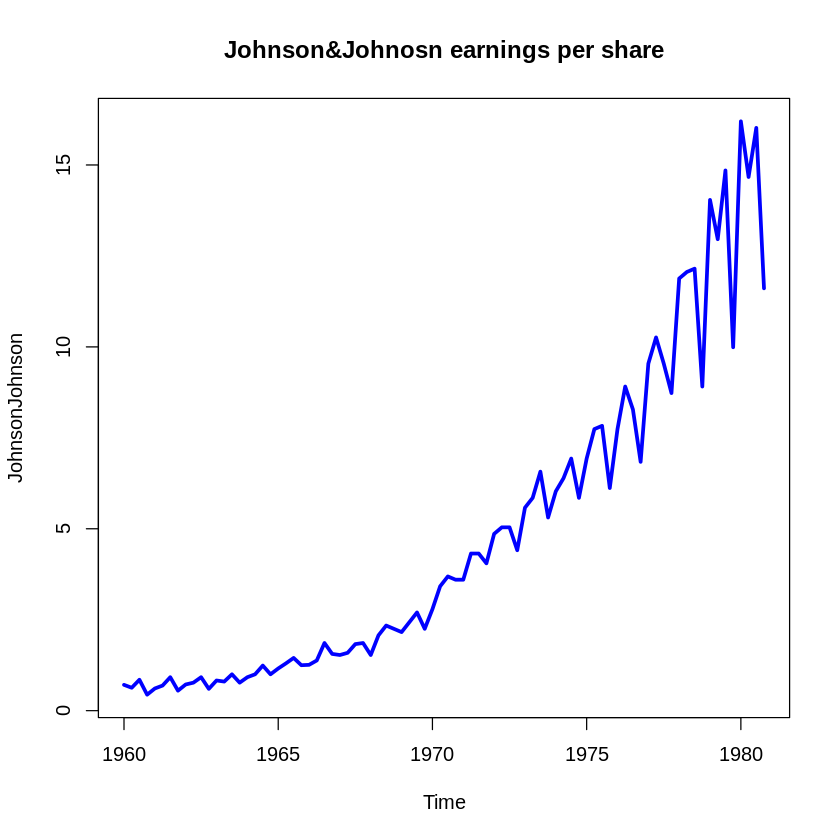

In [1]:
# Time plot for Johnson&Johnson
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

In [2]:
# log-return of Johnson&Johnson
jj.log.return=diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

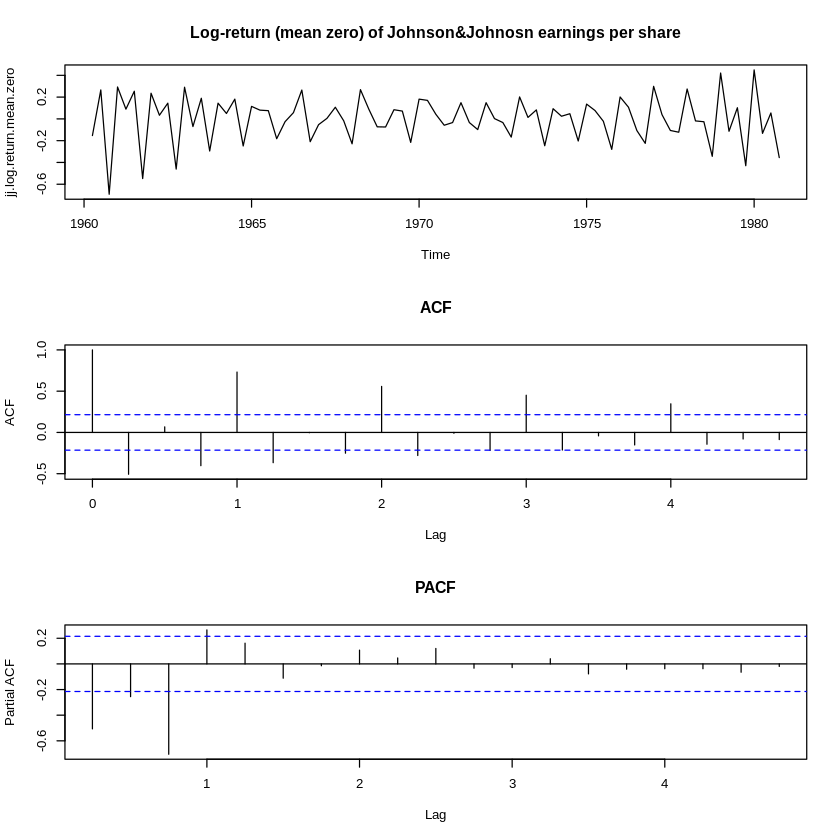

In [3]:
# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

In [4]:
# Order
p=4

In [5]:
# sample autocorreleation function r
r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [6]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 4 by 4, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


In [7]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [8]:
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

In [9]:
# Variance estimation using Yule-Walker Estimator
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.04365692

[1] 0.01419242

In [10]:
# Constant term in the model
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

In [11]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 


## SARIMA code for J&J

In [ ]:
install.packages("astsa")
library(astsa)

In [14]:
d=1
DD=1

per=4

for(p in 1:2){
  for(q in 1:2){
    for(i in 1:2){
      for(j in 1:2){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=log(jj), order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



0 1 0 0 1 0 4 AIC= -124.0685  SSE= 0.9377871  p-VALUE= 0.0001691549 
0 1 0 0 1 1 4 AIC= -126.3493  SSE= 0.8856994  p-VALUE= 0.0001031316 
0 1 0 1 1 0 4 AIC= -125.9198  SSE= 0.8908544  p-VALUE= 0.0001274774 
0 1 0 1 1 1 4 AIC= -124.3648  SSE= 0.8854554  p-VALUE= 0.0001010062 
0 1 1 0 1 0 4 AIC= -145.5139  SSE= 0.6891988  p-VALUE= 0.02622113 
0 1 1 0 1 1 4 AIC= -150.7528  SSE= 0.6265214  p-VALUE= 0.5437345 
0 1 1 1 1 0 4 AIC= -150.9134  SSE= 0.6251634  p-VALUE= 0.6461698 
0 1 1 1 1 1 4 AIC= -149.1317  SSE= 0.6232876  p-VALUE= 0.6147904 
1 1 0 0 1 0 4 AIC= -139.8248  SSE= 0.7467494  p-VALUE= 0.025911 
1 1 0 0 1 1 4 AIC= -146.0191  SSE= 0.6692691  p-VALUE= 0.4749547 
1 1 0 1 1 0 4 AIC= -146.0319  SSE= 0.6689661  p-VALUE= 0.4959783 
1 1 0 1 1 1 4 AIC= -144.3766  SSE= 0.6658382  p-VALUE= 0.4807925 
1 1 1 0 1 0 4 AIC= -145.8284  SSE= 0.667109  p-VALUE= 0.178774 
1 1 1 0 1 1 4 AIC= -148.7706  SSE= 0.6263677  p-VALUE= 0.5294738 
1 1 1 1 1 0 4 AIC= -148.9175  SSE= 0.6251104  p-VALUE= 0.6585311 


initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged
<><><><><><><><><><><><><><>
 
Coefficients: 
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

sigma^2 estimated as 0.00791345 on 77 degrees of freedom 
 
AIC = -1.910297  AICc = -1.908298  BIC = -1.820318 
 


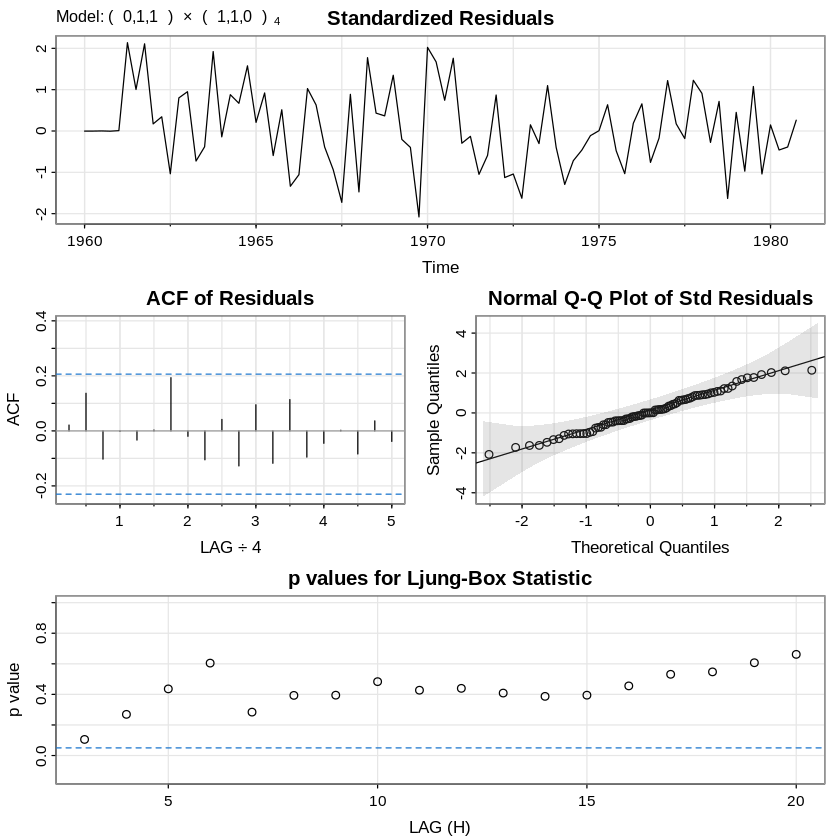

In [15]:
sarima(log(jj), 0,1,1,1,1,0,4)